In [49]:
# Import necessary packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [50]:
# Function for legible graphs (set dimensions and increase label font sizes)
def legible_graph(x, y):
    sns.set(rc={'figure.figsize':(x, y)})
    plt.rc('axes', titlesize=24) # Fontsize of title
    plt.rc('axes', labelsize=20) # Fontsize of x and y labels
    plt.rc('xtick', labelsize=16) # Fontsize of tick labels
    plt.rc('ytick', labelsize=16)
    plt.rc('legend', fontsize=14)
    
# Function to label title and axes, and to specify if want logx or logy scale
def set_labels(title, xlabel, ylabel, logx=False, logy=False):
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    if logx:
        plt.xscale('log')
    if logy:
        plt.yscale('log')
    plt.tight_layout()

# Initial data processing
- Extracted cities/counties of interest
- Transposed dataframe

In [51]:
# Load data
# Source: https://github.com/CSSEGISandData/COVID-19/
cases = pd.read_csv("time_series_covid19_confirmed_US.csv")
deaths = pd.read_csv("time_series_covid19_deaths_US.csv")

# Examine general format
deaths.head()

,UID,iso2,iso3,code3,FIPS,Admin2,Province_State,Country_Region,Lat,Long_,...,4/12/20,4/13/20,4/14/20,4/15/20,4/16/20,4/17/20,4/18/20,4/19/20,4/20/20,4/21/20
0,16,AS,ASM,16,60.0,NaN,American Samoa,US,-14.2710,-170.1320,...,0,0,0,0,0,0,0,0,0,0
1,316,GU,GUM,316,66.0,NaN,Guam,US,13.4443,144.7937,...,5,5,5,5,5,5,5,5,5,5
2,580,MP,MNP,580,69.0,NaN,Northern Mariana Islands,US,15.0979,145.6739,...,2,2,2,2,2,2,2,2,2,2
3,630,PR,PRI,630,72.0,NaN,Puerto Rico,US,18.2208,-66.5901,...,44,45,45,51,56,58,60,62,63,64
4,850,VI,VIR,850,78.0,NaN,Virgin Islands,US,18.3358,-64.8963,...,1,1,1,1,1,2,3,3,3,3


In [52]:
# List of cities of interest (as city/county, state pairs)
cities = [('New York', 'New York'), ('Suffolk', 'Massachusetts'), ('San Francisco', 'California'),
          ('King', 'Washington')]

# Select only counties of interest
select_cases = pd.DataFrame()
select_deaths = pd.DataFrame()
for (city, state) in cities:
    select_cases = select_cases.append(cases[(cases['Admin2']==city) & (cases['Province_State']==state)])
    select_deaths = select_deaths.append(deaths[(deaths['Admin2']==city) & (deaths['Province_State']==state)])

# Drop some columns not needed for this analysis
cols = ['UID', 'iso2', 'iso3', 'code3', 'FIPS', 'Province_State',
        'Country_Region', 'Lat', 'Long_', 'Combined_Key']
select_cases = select_cases.drop(cols, axis=1)
select_deaths = select_deaths.drop(cols + ['Population'], axis=1)

select_deaths.head()

,Admin2,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,...,4/12/20,4/13/20,4/14/20,4/15/20,4/16/20,4/17/20,4/18/20,4/19/20,4/20/20,4/21/20
1863,New York,0,0,0,0,0,0,0,0,0,...,6898,7349,7905,8455,11477,13202,13202,14451,14604,14887
1234,Suffolk,0,0,0,0,0,0,0,0,0,...,86,86,86,145,145,164,188,236,236,285
228,San Francisco,0,0,0,0,0,0,0,0,0,...,14,15,15,17,17,20,20,20,20,20
2974,King,0,0,0,0,0,0,0,0,0,...,292,292,296,303,312,331,331,346,346,360


In [53]:
# Transpose the dataframes
cases_transposed = select_cases.set_index('Admin2').transpose()
deaths_transposed = select_deaths.set_index('Admin2').transpose()

# Reorder columns of dataframe to match order of cities list
cases_transposed = cases_transposed[[x for (x,y) in cities]]
deaths_transposed = deaths_transposed[[x for (x,y) in cities]]

# Remove column index name
del cases_transposed.columns.name
del deaths_transposed.columns.name

In [54]:
# Save selected data
cases_transposed.to_csv(r'time_series_covid19_confirmed_US_selected.csv')
deaths_transposed.to_csv(r'time_series_covid19_deaths_US_selected.csv')

cases_transposed.tail()

,New York,Suffolk,San Francisco,King
4/17/20,127352,7272,1058,4902
4/18/20,135572,7696,1137,4902
4/19/20,138700,8074,1157,5174
4/20/20,141235,8074,1216,5174
4/21/20,144190,8669,1231,5293


# Initial exploratory data analysis
- Cases and deaths over time on linear scale
- Cases and deaths over time on log scale

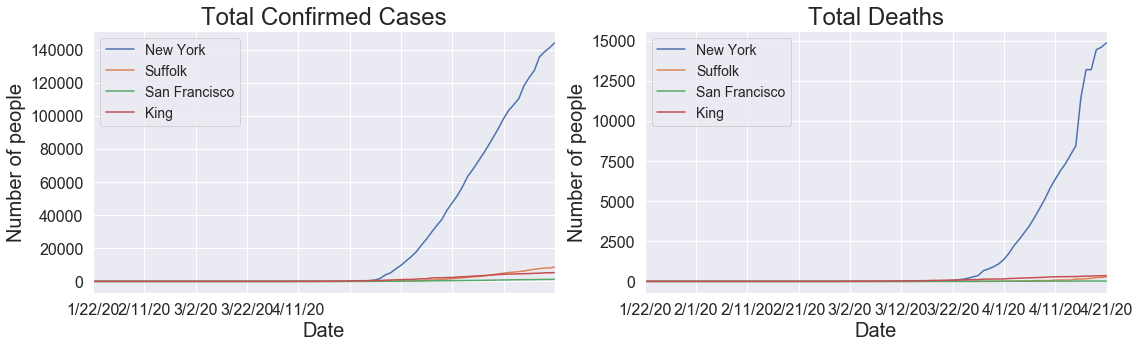

In [55]:
# Linear graph
# Figure settings
legible_graph(16, 5)

# Plot total cases and deaths over time on linear scale
plt.subplot(1, 2, 1)
cases_transposed.plot(ax=plt.gca())
set_labels('Total Confirmed Cases', 'Date', 'Number of people')

plt.subplot(1, 2, 2)
deaths_transposed.plot(ax=plt.gca())
set_labels('Total Deaths', 'Date', 'Number of people')

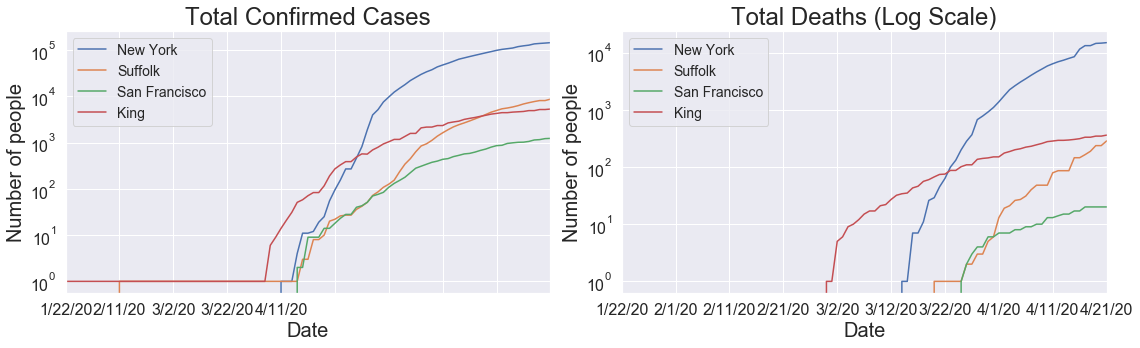

In [56]:
# Log graph
# Figure settings
legible_graph(16, 5)

# Plot total cases and deaths over time on logy scale
plt.subplot(1, 2, 1)
cases_transposed.plot(logy=True, ax=plt.gca())
set_labels('Total Confirmed Cases', 'Date', 'Number of people', logy=True)

plt.subplot(1, 2, 2)
deaths_transposed.plot(logy=True, ax=plt.gca())
set_labels('Total Deaths (Log Scale)', 'Date', 'Number of people', logy=True)

# Visualize trajectory
- New confirmed cases and deaths in past week vs. total confirmed cases and deaths on log scale
- Based on: https://aatishb.com/covidtrends

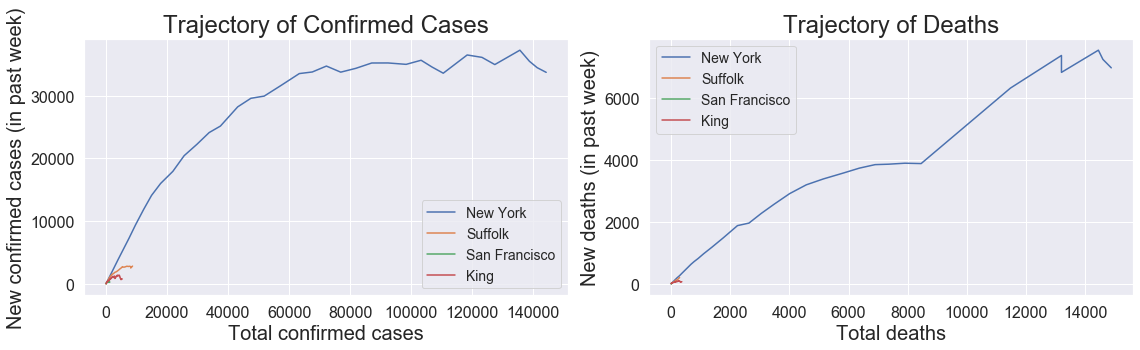

In [57]:
# Linear plot
# Reset index and remove 'Date' column
cases_no_date = cases_transposed.reset_index(drop=True)
deaths_no_date = deaths_transposed.reset_index(drop=True)

# Take difference in cumulative total between each day and 7 days prior
deaths_week_total = deaths_no_date - deaths_no_date.shift(7)
cases_week_total = cases_no_date - cases_no_date.shift(7)

# Plot new confirmed cases and deaths in past week vs. total confirmed cases and deaths on linear scale
plt.subplot(1, 2, 1)
plt.plot(cases_no_date, cases_week_total)
set_labels('Trajectory of Confirmed Cases', 'Total confirmed cases', 'New confirmed cases (in past week)')
plt.legend(cases_no_date.columns)

plt.subplot(1, 2, 2)
plt.plot(deaths_no_date, deaths_week_total)
set_labels('Trajectory of Deaths', 'Total deaths', 'New deaths (in past week)')
plt.legend(deaths_no_date.columns)

(0, 25)

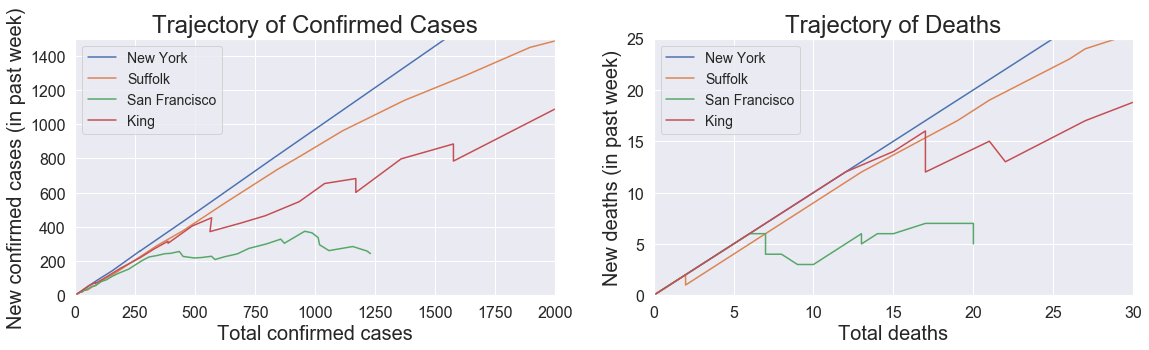

In [58]:
# Linear plot zoomed in
# Plot new confirmed cases and deaths in past week vs. total confirmed cases and deaths on linear scale
plt.subplot(1, 2, 1)
plt.plot(cases_no_date, cases_week_total)
set_labels('Trajectory of Confirmed Cases', 'Total confirmed cases', 'New confirmed cases (in past week)')
plt.legend(cases_no_date.columns)
plt.xlim(0, 2000)
plt.ylim(0, 1500)

plt.subplot(1, 2, 2)
plt.plot(deaths_no_date, deaths_week_total)
set_labels('Trajectory of Deaths', 'Total deaths', 'New deaths (in past week)')
plt.legend(deaths_no_date.columns)
plt.xlim(0, 30)
plt.ylim(0, 25)

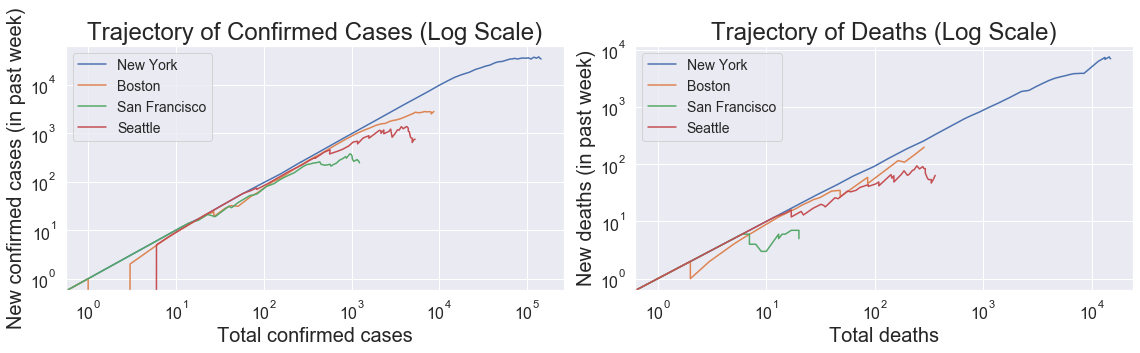

In [59]:
# Log plot
# Plot new confirmed cases and deaths in past week vs. total confirmed cases and deaths on log scale
plt.subplot(1, 2, 1)
plt.plot(cases_no_date, cases_week_total)
set_labels('Trajectory of Confirmed Cases (Log Scale)', 'Total confirmed cases',
           'New confirmed cases (in past week)', logx=True, logy=True)
plt.legend(['New York', 'Boston', 'San Francisco', 'Seattle'])

plt.subplot(1, 2, 2)
plt.plot(deaths_no_date, deaths_week_total)
set_labels('Trajectory of Deaths (Log Scale)', 'Total deaths',
           'New deaths (in past week)', logx=True, logy=True)
plt.legend(['New York', 'Boston', 'San Francisco', 'Seattle'])

(0.9, 500)

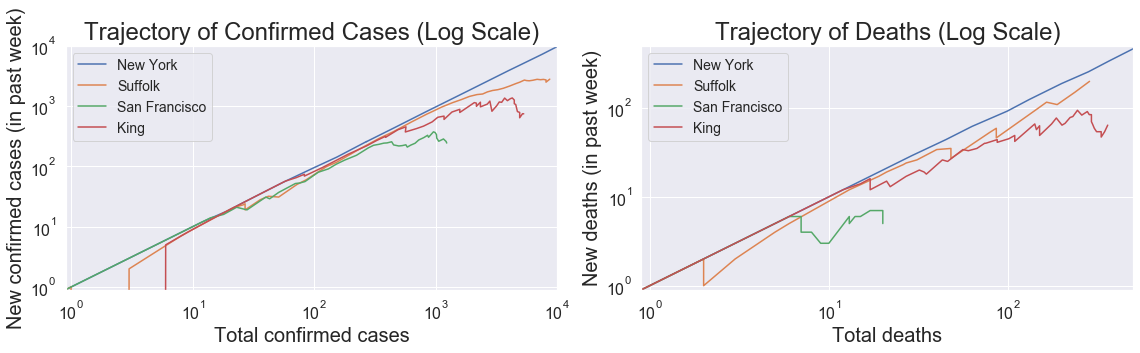

In [60]:
# Log plot zoomed in
# Plot new confirmed cases and deaths in past week vs. total confirmed cases and deaths on linear scale
plt.subplot(1, 2, 1)
plt.plot(cases_no_date, cases_week_total)
set_labels('Trajectory of Confirmed Cases (Log Scale)', 'Total confirmed cases',
           'New confirmed cases (in past week)', logx=True, logy=True)
plt.legend(cases_no_date.columns)
plt.xlim(9e-1, 10000)
plt.ylim(9e-1, 10000)

plt.subplot(1, 2, 2)
plt.plot(deaths_no_date, deaths_week_total)
set_labels('Trajectory of Deaths (Log Scale)', 'Total deaths',
           'New deaths (in past week)', logx=True, logy=True)
plt.legend(deaths_no_date.columns)
plt.xlim(9e-1, 500)
plt.ylim(9e-1, 500)